# Loading data sets

In [9]:
import pandas as pd
all_yield = pd.read_csv("C:/Users/MPanis/Rode Kruis/510 - Data preparedness and IBF - [PRJ] FbF - Zimbabwe - Danish Red Cross/3. Data - Hazard exposure, vulnerability/zwe_cropyield/all_yield_maize_major.csv",index_col='pcode')
enso = pd.read_csv("ENSO.csv")


## Drought years

We remove the livelyhoods and the year that only have nan values for the yield.

In [10]:
all_yield = all_yield[all_yield['year']!=1981]
all_yield = all_yield.drop('ZW0')
all_yield = all_yield.drop('ZW08')
all_yield = all_yield.drop('ZW13')
all_yield = all_yield.drop('ZW19')

Computing the mean & standard deviation per livelyhood and subsequently the anomaly.

In [11]:
all_yield['mean'] =  all_yield[['yield']].groupby("pcode").mean()
all_yield['std'] =  all_yield[['yield']].groupby("pcode").std()
all_yield['anomaly'] = (all_yield['yield']-all_yield['mean'])/all_yield['std']


In [12]:
all_yield

,year,yield,mean,std,anomaly
pcode,,,,,
ZW01,1982,1.100027,1.229828,0.341868,-0.379683
ZW02,1982,0.808338,0.713751,0.324571,0.291422
ZW03,1982,1.361959,1.102925,0.503937,0.514021
ZW04,1982,1.192120,0.989794,0.444371,0.455308
ZW05,1982,1.333377,1.160868,0.586593,0.294087
...,...,...,...,...,...
ZW22,2016,0.686206,0.508226,0.212110,0.839096
ZW23,2016,0.581053,0.862821,0.355208,-0.793247
ZW24,2016,0.568713,0.955872,0.463157,-0.835913


We now determine the drought years

In [13]:
all_yield['drought'] = all_yield['anomaly']<=-1
nr_livelyhoods_drought = all_yield[['year','drought']].groupby('year').sum()
drought_years = list(nr_livelyhoods_drought[nr_livelyhoods_drought['drought']>=10].index)

In [14]:
drought_years

[1992, 1995, 2002, 2005, 2008, 2009, 2015]

# El Niño years

We restrict the data to the years we have the yield of.

In [102]:
enso = enso[(enso["Year"]>=1981) & (enso["Year"]<=2016)]
transformed_enso = enso.drop("Year",axis=1).stack().reset_index().drop("level_0",axis=1).set_index("level_1")

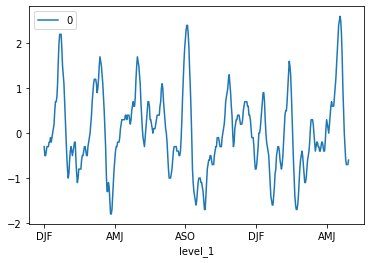

In [103]:
transformed_enso.plot()

We now determine which years can be characterized as El niño (and la niña) years, i.e. they have 5 or more subsequent months in which the enso indicator is larger or equal to 0.5 (or smaller or equal to -0.5). The 3-month averages we consider start with JAS (July-August-September) of the previous year and end with JJA of the examined year. 

In [104]:
months1=["JAS","ASO","SON","OND","NDJ"]
months2=["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA"]
for year in enso.loc[enso["Year"]>=1982,"Year"]:
    yearr = enso[enso["Year"]==year-1].reset_index()
    total1 = (yearr.loc[:,"JAS":"NDJ"]>=0.5).sum(axis=1)[0]
    total2 = (yearr.loc[:,"JAS":"NDJ"]<=-0.5).sum(axis=1)[0]
    yearr = enso[enso["Year"]==year].reset_index()
    total1 += (yearr.loc[:,"DJF":"JJA"]>=0.5).sum(axis=1)[0]
    total2 += (yearr.loc[:,"DJF":"JJA"]<=-0.5).sum(axis=1)[0]
    if total1>=5:
        enso.loc[enso["Year"]==year,"elnino"]=True
    else:
        enso.loc[enso["Year"]==year,"elnino"]=False
    if total2>=5:
        enso.loc[enso["Year"]==year,"lanina"]=True
    else:
        enso.loc[enso["Year"]==year,"lanina"]=False





In [83]:
elnino = list(enso[(enso["elnino"]==True)]["Year"])
lanina = list(enso[(enso["lanina"]==True)]["Year"])

In [84]:
elnino

[1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2007, 2010, 2015, 2016]

In [113]:
#FAR = FA / (FA + HIT) 
FAR_ = 8 / (8 + 4) # crop yield Anomaly = -.1
POD_ = 4/ (3+4)
FAR = 4 / (4+8) # crop yiled anomlay = -.0.5 
POD = 8 / (8+5)
FAR_EMDAT = 3 / (3 + 3) # based on EMDAT Drought Reported Droughts
POD_EMDAT = 3 /  (3 + 3)

# Examination relation el niño and drought years 

* How many drought years would have been detected: 4 out of 7, namely 1992, 1995, 2005, 2015
* FAR = 2/3
* How many triggers in the last 10 years: 2

Let's examine the enso for the drought years that wouldn't have been detected: 2002, 2008 and 2009.

In [33]:
enso[enso['Year'].isin([2001,2002,2007, 2008, 2009])]

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ,elnino,lanina
51,2001,-0.7,-0.5,-0.4,-0.3,-0.3,-0.1,-0.1,-0.1,-0.2,-0.3,-0.3,-0.3,False,True
52,2002,-0.1,0.0,0.1,0.2,0.4,0.7,0.8,0.9,1.0,1.2,1.3,1.1,False,False
57,2007,0.7,0.3,0.0,-0.2,-0.3,-0.4,-0.5,-0.8,-1.1,-1.4,-1.5,-1.6,True,False
58,2008,-1.6,-1.4,-1.2,-0.9,-0.8,-0.5,-0.4,-0.3,-0.3,-0.4,-0.6,-0.7,False,True
59,2009,-0.8,-0.7,-0.5,-0.2,0.1,0.4,0.5,0.5,0.7,1.0,1.3,1.6,False,True


In [108]:
enso[enso['Year'].isin([1982,1991,1998, 2001, 2007, 2010])] #EMDAT DROUGHT YEARS

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ,elnino,lanina
32,1982,0.0,0.1,0.2,0.5,0.7,0.7,0.8,1.1,1.6,2.0,2.2,2.2,False,False
41,1991,0.4,0.3,0.2,0.3,0.5,0.6,0.7,0.6,0.6,0.8,1.2,1.5,False,False
48,1998,2.2,1.9,1.4,1.0,0.5,-0.1,-0.8,-1.1,-1.3,-1.4,-1.5,-1.6,True,False
51,2001,-0.7,-0.5,-0.4,-0.3,-0.3,-0.1,-0.1,-0.1,-0.2,-0.3,-0.3,-0.3,False,True
57,2007,0.7,0.3,0.0,-0.2,-0.3,-0.4,-0.5,-0.8,-1.1,-1.4,-1.5,-1.6,True,False
60,2010,1.5,1.3,0.9,0.4,-0.1,-0.6,-1.0,-1.4,-1.6,-1.7,-1.7,-1.6,True,False


We find that both 2008 and 2009 are la nina years. So a slight change in our criteria for triggering for el niño is not going to make a difference.

We  now examine the relation between yield in el niño and la niña years. Per livelyhood we check if the distribution of yield in el nino years is significantly less than in la niña years by doing a T-test.

In [34]:
from scipy.stats import ttest_ind

In [35]:
elnino_yield = all_yield[all_yield['year'].isin(elnino)]['yield']
lanina_yield = all_yield[all_yield['year'].isin(lanina)]['yield']

In [36]:
for index in elnino_yield.index.unique():
    statistic, pvalue = ttest_ind(elnino_yield[index],lanina_yield[index],equal_var=False)
    print(index,round(statistic,3), round(pvalue/2,3))

ZW01 -1.95 0.033
ZW02 -1.959 0.032
ZW03 -1.738 0.049
ZW04 -1.804 0.043
ZW05 nan nan
ZW06 -1.859 0.039
ZW07 -1.778 0.045
ZW09 -1.994 0.03
ZW10 -1.792 0.044
ZW11 -1.867 0.038
ZW12 -1.79 0.044
ZW14 -1.971 0.032
ZW15 -1.957 0.033
ZW16 -1.93 0.034
ZW17 -1.915 0.035
ZW18 -1.965 0.032
ZW20 -1.822 0.041
ZW21 -2.013 0.029
ZW22 -1.475 0.077
ZW23 -2.25 0.018
ZW24 -1.95 0.033
ZW25 -1.905 0.035
ZW26 -2.042 0.027


With a 5% confidence level we thus indeed find a lower yield in el nino years than in la nina years.

Let's also examine if we find a difference in yield between years in a el nino dominant cycle or in a la nina dominant cycle.

In [37]:
elnino_cycle = [1984,1985,1986,1987,1988,1989,1990,1991,1992,2001,2002,2003,2004,2005,2006,2007]
lanina_cycle = [1993,1994,1995,1996,1997,1998,1999,2000,2008,2009,2010,2011,2012,2013,2014]

In [38]:
elninocycle_yield = all_yield[all_yield['year'].isin(elnino_cycle)]['yield']
laninacycle_yield = all_yield[all_yield['year'].isin(lanina_cycle)]['yield']

In [39]:
for index in elninocycle_yield.index.unique():
    statistic, pvalue = ttest_ind(elninocycle_yield[index],laninacycle_yield[index],equal_var=False)
    print(index,round(statistic,3), round(pvalue/2,3))

ZW01 -1.087 0.143
ZW02 -0.012 0.495
ZW03 0.553 0.292
ZW04 0.476 0.319
ZW05 0.675 0.252
ZW06 0.687 0.249
ZW07 0.58 0.283
ZW09 0.408 0.343
ZW10 0.525 0.302
ZW11 0.496 0.312
ZW12 0.465 0.323
ZW14 0.583 0.282
ZW15 0.515 0.305
ZW16 0.424 0.337
ZW17 0.502 0.31
ZW18 0.194 0.424
ZW20 0.304 0.382
ZW21 0.306 0.381
ZW22 -3.792 0.0
ZW23 0.011 0.496
ZW24 0.164 0.435
ZW25 0.251 0.402
ZW26 0.204 0.42


This we can't conclude.